In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import matplotlib.ticker as mtick
plt.style.use('seaborn-v0_8-whitegrid')

In [3]:
llama2 = pd.read_csv("../Results/llama2_7b_chat/results_2000_2999.csv")
mistral = pd.read_csv("../Results/mistral_7b_instruct/results_2000_2999.csv")
openai = pd.read_csv("../Results/openai/results_2000_2999.csv")

In [4]:
llama2_1 = pd.read_csv("../Results/llama2_7b_chat/results_3000_3999.csv")
mistral_1 = pd.read_csv("../Results/mistral_7b_instruct/results_3000_3999.csv")
openai_1 = pd.read_csv("../Results/openai/results_3000_3999.csv")

In [5]:
llama2 = pd.concat([llama2, llama2_1], axis=0).reset_index(drop=True)
mistral = pd.concat([mistral, mistral_1], axis=0).reset_index(drop=True)
openai = pd.concat([openai, openai_1], axis=0).reset_index(drop=True)



In [6]:
llama2['model'] = 'llama2'
mistral['model'] = 'mistral'
openai['model'] = 'openai'


In [7]:
llama2 = llama2[['GLOBAL_ID', 'processed_txt', 'travel_mode', 'sentiment', 'reasoning', 'model']]
mistral = mistral[['GLOBAL_ID', 'processed_txt', 'travel_mode', 'sentiment', 'reasoning', 'model']]
openai = openai[['GLOBAL_ID', 'processed_txt', 'travel_mode', 'sentiment', 'reasoning', 'model']]

In [41]:
df = pd.concat([llama2, mistral, openai], axis=0).sort_values(["GLOBAL_ID", "model"]).reset_index(drop=True)
df

,GLOBAL_ID,processed_txt,travel_mode,sentiment,reasoning,model
0,2000,rush hour train to midtown does not feel like ...,Subway,Positive,The train was less crowded than usual during r...,llama2
1,2000,rush hour train to midtown does not feel like ...,Subway,Negative,The train during rush hour did not feel crowded.,mistral
2,2000,rush hour train to midtown does not feel like ...,Subway,Neutral,No indication of sentiment towards the train.,openai
3,2001,he just reevaluating his life because he had t...,Subway,Positive,The tweet mentions getting on a train without ...,llama2
4,2001,he just reevaluating his life because he had t...,Subway,Negative,The person got on the train without a mask or ...,mistral
...,...,...,...,...,...,...
5995,3998,the mta has been a shit show for the past seve...,Subway,Negative,"The subway has been a ""shit show"" due to under...",mistral
5996,3998,the mta has been a shit show for the past seve...,NaN,NaN,NaN,openai
5997,3999,so how are we all celebrating reinaguration da...,Subway,Negative,The tweet mentions heating up food on the subw...,llama2
5998,3999,so how are we all celebrating reinaguration da...,Subway,Negative,The tweet is about celebrating Reinaguration D...,mistral


In [ ]:
df.to_csv("../Results/comp_pivot.csv", index=False)

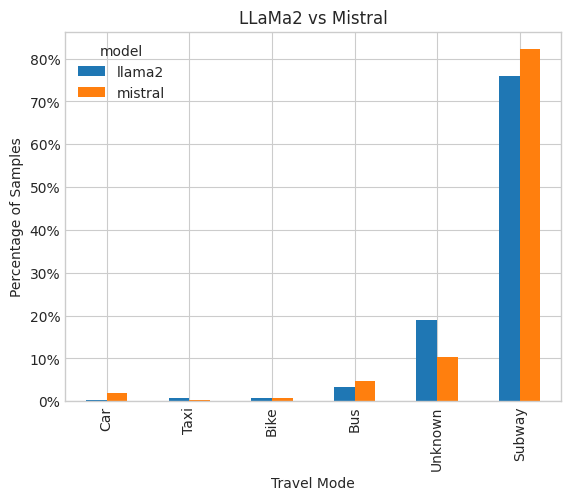

In [9]:
df1 = df[df['model']!='openai'].groupby(['model'])['travel_mode'].value_counts().reset_index()
df1['count'] /= df['GLOBAL_ID'].nunique()

ax = df1.pivot(index='travel_mode',
               columns='model', 
               values='count').sort_values('llama2').plot(kind='bar',
                                                          xlabel='Travel Mode', 
                                                          ylabel='Percentage of Samples', 
                                                          title='LLaMa2 vs Mistral')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

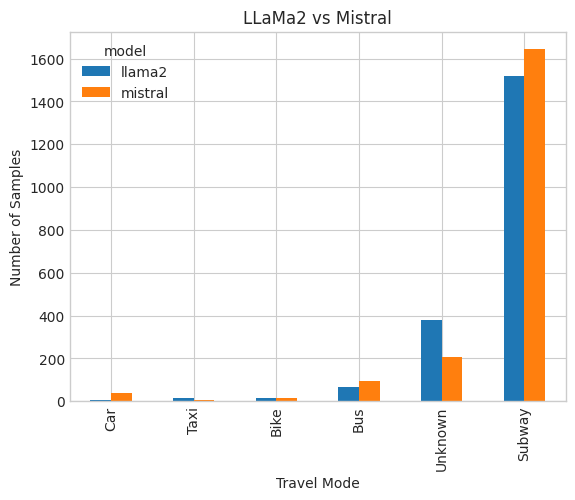

In [10]:
df1 = df[df['model']!='openai'].groupby(['model'])['travel_mode'].value_counts().reset_index()

ax = df1.pivot(index='travel_mode',
               columns='model', 
               values='count').sort_values('llama2').plot(kind='bar',
                                                          xlabel='Travel Mode', 
                                                          ylabel='Number of Samples', 
                                                          title='LLaMa2 vs Mistral')
# ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

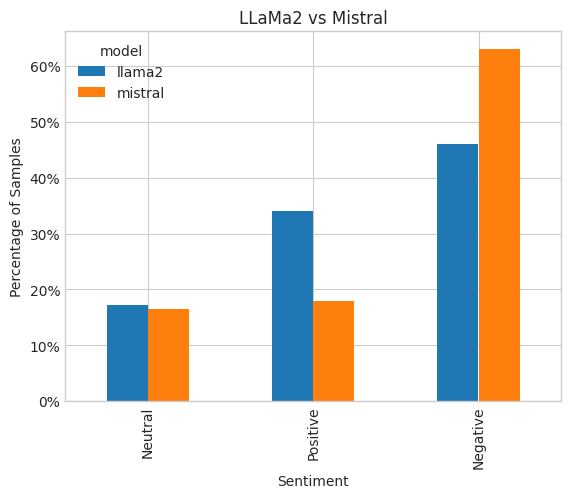

In [11]:
df1 = df[df['model']!='openai'].groupby(['model'])['sentiment'].value_counts().reset_index()
df1['count'] /= df['GLOBAL_ID'].nunique()

ax = df1.pivot(index='sentiment',
               columns='model', 
               values='count').sort_values('llama2').plot(kind='bar',
                                                          xlabel='Sentiment', 
                                                          ylabel='Percentage of Samples', 
                                                          title='LLaMa2 vs Mistral')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

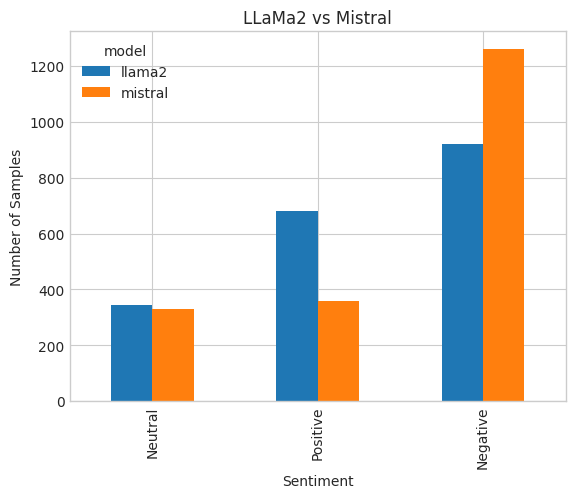

In [12]:
df1 = df[df['model']!='openai'].groupby(['model'])['sentiment'].value_counts().reset_index()

ax = df1.pivot(index='sentiment',
               columns='model', 
               values='count').sort_values('llama2').plot(kind='bar',
                                                          xlabel='Sentiment', 
                                                          ylabel='Number of Samples', 
                                                          title='LLaMa2 vs Mistral')


<Axes: title={'center': 'Pairwise Alignment of Travel Modes (LLaMa2 vs Mistral)'}, xlabel='Travel Modes (LLaMa2, Mistral)', ylabel='Count'>

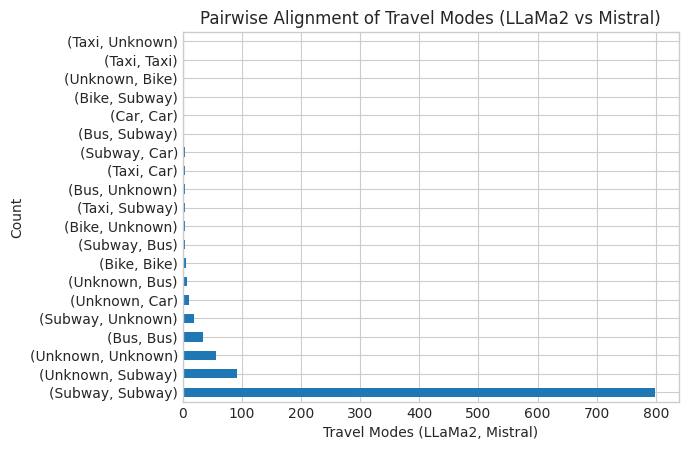

In [29]:
comps_travel_mode = df[df['model']!='openai'].pivot(index='GLOBAL_ID', columns='model', values=['travel_mode', 'sentiment'])['travel_mode'].value_counts()
comps_travel_mode.plot(kind='barh', xlabel='Travel Modes (LLaMa2, Mistral)', ylabel='Count', title='Pairwise Alignment of Travel Modes (LLaMa2 vs Mistral)')

<Axes: title={'center': 'Pairwise Alignment of Sentiment\n(LLaMa2 vs Mistral)'}, xlabel='Sentiment (LLaMa2, Mistral)', ylabel='Count'>

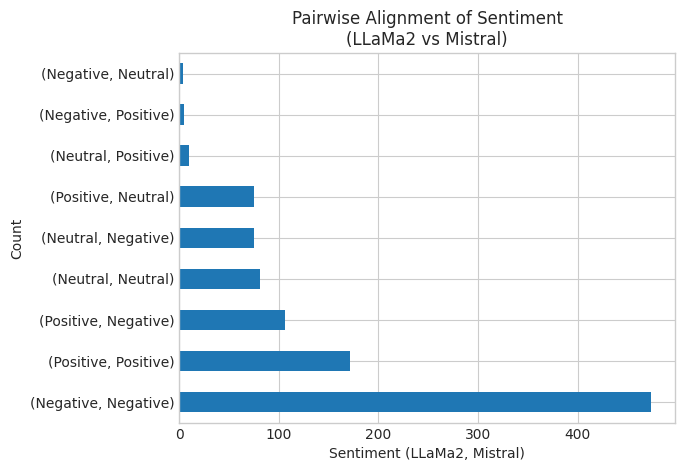

In [28]:
comps_travel_mode = df[df['model']!='openai'].pivot(index='GLOBAL_ID', columns='model', values=['travel_mode', 'sentiment'])['sentiment'].value_counts()
comps_travel_mode.plot(kind='barh', xlabel='Sentiment (LLaMa2, Mistral)', ylabel='Count', title='Pairwise Alignment of Sentiment\n(LLaMa2 vs Mistral)')

In [15]:
max_gid = openai.loc[openai.travel_mode.isna().idxmax(), 'GLOBAL_ID']
max_gid

3050

In [16]:
df = df[df['GLOBAL_ID'] < max_gid]


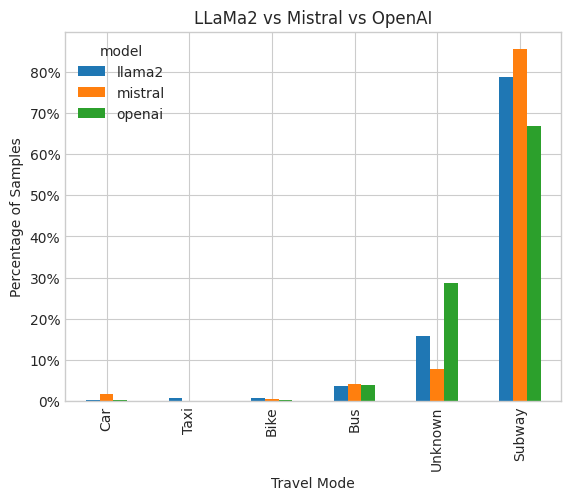

In [17]:
df1 = df.groupby(['model'])['travel_mode'].value_counts().reset_index()
df1['count'] /= df['GLOBAL_ID'].nunique()

ax = df1.pivot(index='travel_mode',
               columns='model', 
               values='count').sort_values('llama2').plot(kind='bar',
                                                          xlabel='Travel Mode', 
                                                          ylabel='Percentage of Samples', 
                                                          title='LLaMa2 vs Mistral vs OpenAI')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

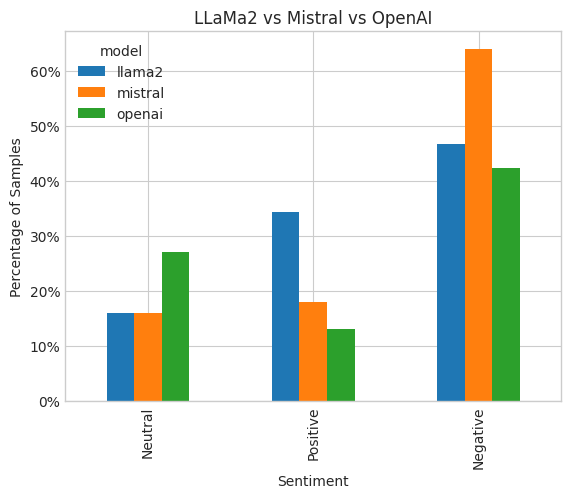

In [18]:
df1 = df.groupby(['model'])['sentiment'].value_counts().reset_index()
df1['count'] /= df['GLOBAL_ID'].nunique()

ax = df1.pivot(index='sentiment',
               columns='model', 
               values='count').sort_values('llama2').plot(kind='bar',
                                                          xlabel='Sentiment', 
                                                          ylabel='Percentage of Samples', 
                                                          title='LLaMa2 vs Mistral vs OpenAI')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

<Axes: title={'center': 'Group-wise Alignment of Travel Modes\n(LLaMa2 vs Mistral vs OpenAI)'}, xlabel='Travel Modes (LLaMa2, Mistral, OpenAI)', ylabel='Count'>

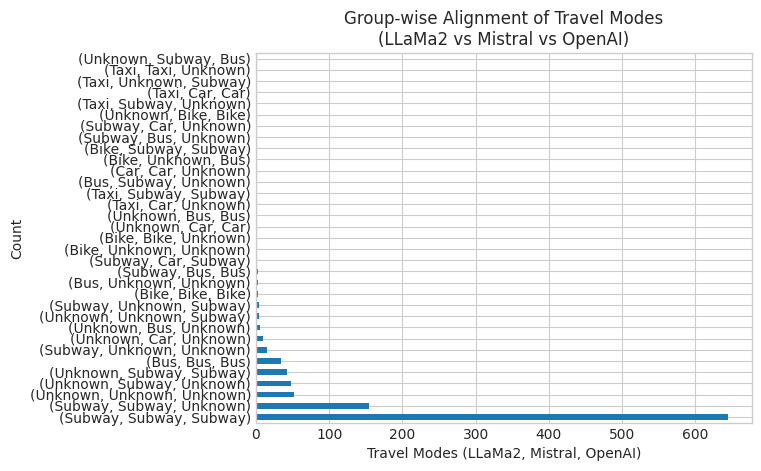

In [27]:
comps_travel_mode = df.pivot(index='GLOBAL_ID', columns='model', values=['travel_mode', 'sentiment'])['travel_mode'].value_counts()
comps_travel_mode.plot(kind='barh', xlabel='Travel Modes (LLaMa2, Mistral, OpenAI)', ylabel='Count', title='Group-wise Alignment of Travel Modes\n(LLaMa2 vs Mistral vs OpenAI)')

<Axes: title={'center': 'Group-wise Alignment of Sentiments\n(LLaMa2 vs Mistral vs OpenAI)'}, xlabel='Sentiments (LLaMa2, Mistral, OpenAI)', ylabel='Count'>

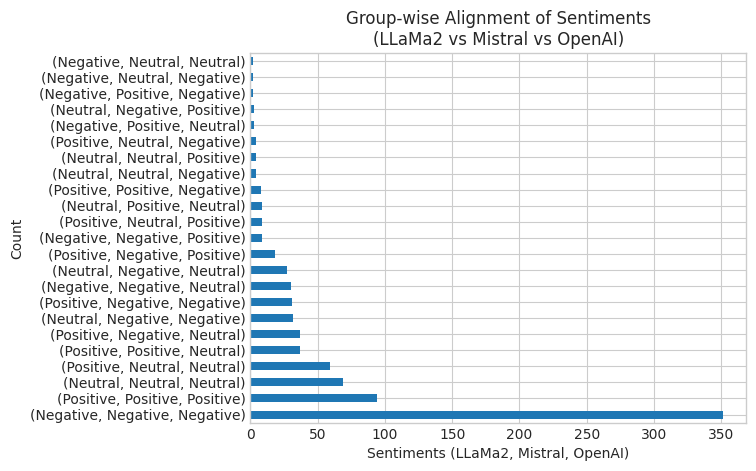

In [26]:
comps_travel_mode = df.pivot(index='GLOBAL_ID', columns='model', values=['travel_mode', 'sentiment'])['sentiment'].value_counts()
comps_travel_mode.plot(kind='barh', xlabel='Sentiments (LLaMa2, Mistral, OpenAI)', ylabel='Count', title='Group-wise Alignment of Sentiments\n(LLaMa2 vs Mistral vs OpenAI)')

In [37]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L6-v2')

# Two lists of sentences
sentences1 = df[(df['model']=='llama2') & (df['GLOBAL_ID'] < max_gid)].values
sentences2 = df[(df['model']=='mistral') & (df['GLOBAL_ID'] < max_gid)].values
sentences3 = df[(df['model']=='openai') & (df['GLOBAL_ID'] < max_gid)].values

#Compute embedding for both lists
embeddings1 = model.encode(sentences1, convert_to_tensor=True)
embeddings2 = model.encode(sentences2, convert_to_tensor=True)
embeddings3 = model.encode(sentences3, convert_to_tensor=True)

#Compute cosine-similarities
cosine_scores_llama2 = util.cos_sim(embeddings1, embeddings3)
cosine_scores_mistral = util.cos_sim(embeddings2, embeddings3)


In [38]:
df = pd.DataFrame({
    'GLOBAL_ID': np.arange(2000, 3050, 1), 
    'score_llama2_openai': np.diag(cosine_scores_llama2.cpu().numpy()),
    'score_mistral_openai': np.diag(cosine_scores_mistral.cpu().numpy())
})

<Axes: xlabel='Sample Index', ylabel='Cosine Similarity'>

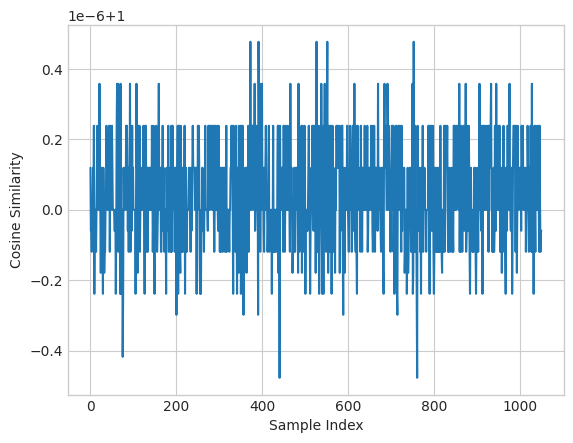

In [39]:
df['score_llama2_openai'].plot(xlabel='Sample Index', ylabel ='Cosine Similarity')

Text(0.5, 0, 'cosine similarity')

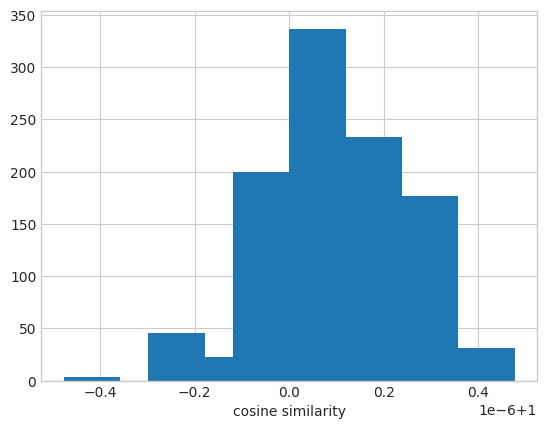

In [40]:
df['score_llama2_openai'].hist().set_xlabel('cosine similarity')

In [18]:
df.to_csv("../Results/comp.csv", index=False)

In [ ]:
pd.melt(df, id_vars=['GLOBAL_ID', 'processed_txt'], value_vars=['travel_mode_'])